In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

db = pd.read_csv("train.csv")
db.head()


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
db.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [6]:
db.isna().any().any()

np.False_

In [7]:
duplicated_rows = db[db.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [id, age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, Urine protein, serum creatinine, AST, ALT, Gtp, dental caries, smoking]
Index: []

[0 rows x 24 columns]


In [8]:
db = db.drop(columns=['id'])
db.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


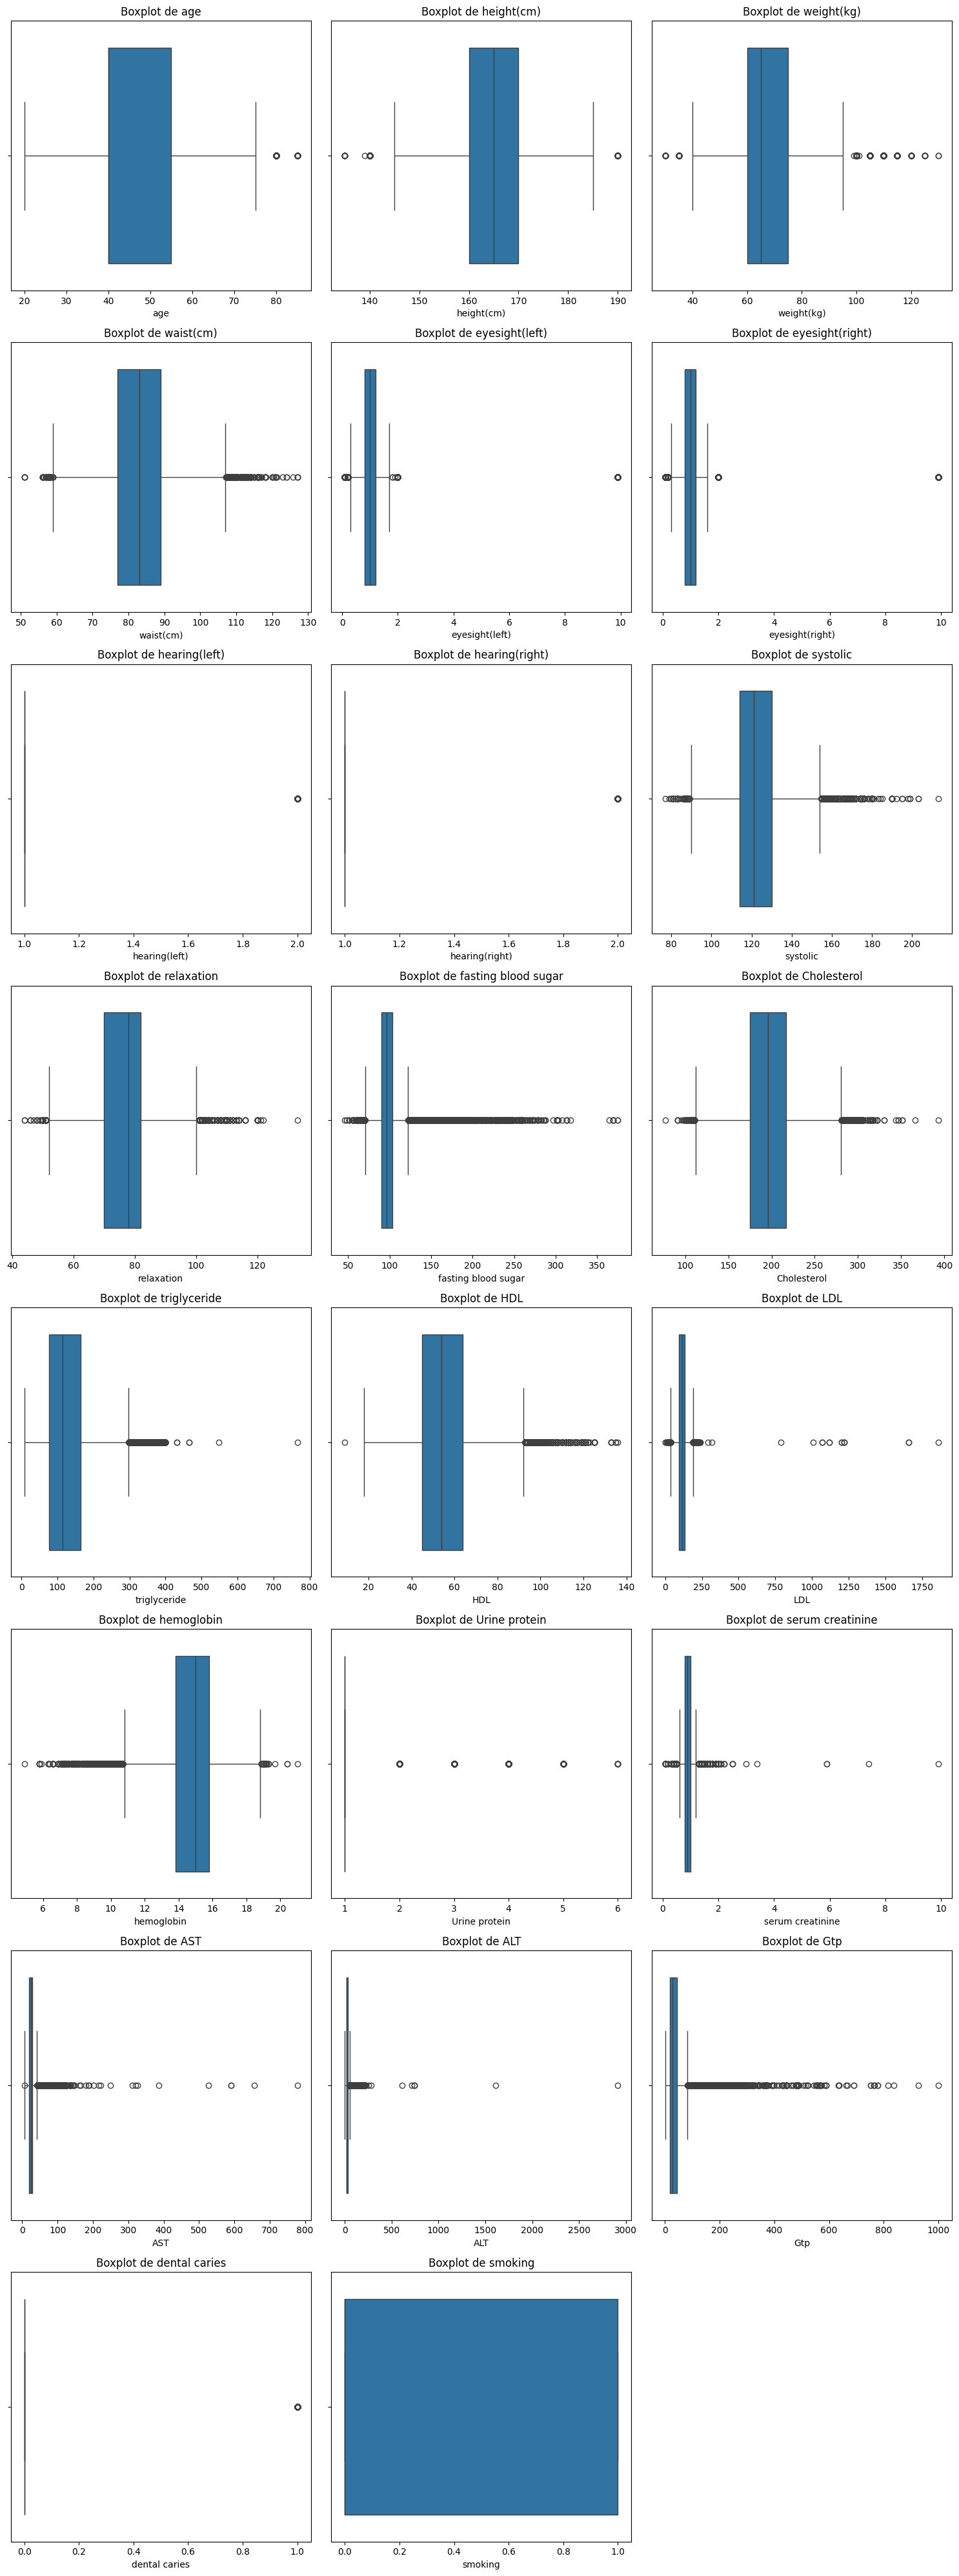

In [9]:
num_columns = len(db.select_dtypes(include='number').columns)

cols = 3 
rows = math.ceil(num_columns / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axes = axes.flatten()

for i, column in enumerate(db.select_dtypes(include='number').columns):
    sb.boxplot(data=db, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [10]:
db = db[db["eyesight(left)"] < 3.0]
db = db[db["eyesight(right)"] < 3.0]
print(db["eyesight(left)"].max())
print(db["eyesight(right)"].max())

2.0
2.0


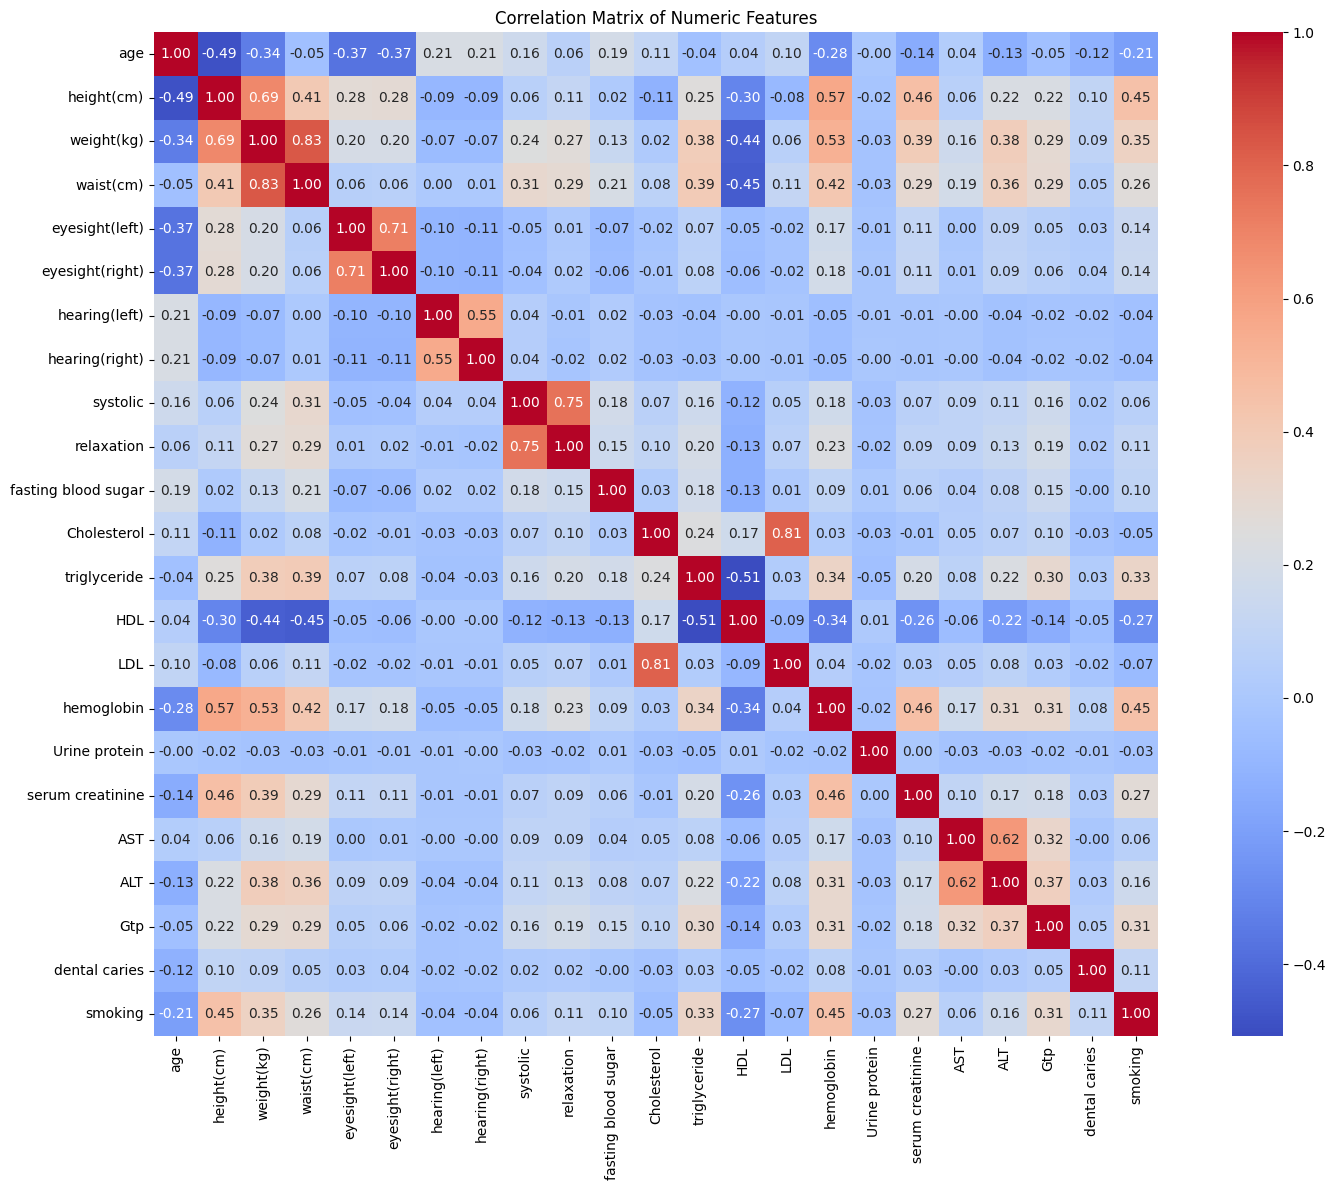

In [11]:
numeric_db = db.select_dtypes(include='number')

# 2. Compute correlation matrix
correlation_matrix = numeric_db.corr()

# 3. Plot the heatmap
plt.figure(figsize=(16, 12))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [12]:
db = db.drop(columns=["waist(cm)", "LDL"])
db.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,...,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,0.5,0.6,1,1,135,87,94,...,300,40,16.5,1,1.0,22,25,27,0,1
1,70,165,65,0.6,0.7,2,2,146,83,147,...,55,57,16.2,1,1.1,27,23,37,1,0
2,20,170,75,0.4,0.5,1,1,118,75,79,...,197,45,17.4,1,0.8,27,31,53,0,1
3,35,180,95,1.5,1.2,1,1,131,88,91,...,203,38,15.9,1,1.0,20,27,30,1,0
4,30,165,60,1.5,1.0,1,1,121,76,91,...,87,44,15.4,1,0.8,19,13,17,0,1


<Axes: >

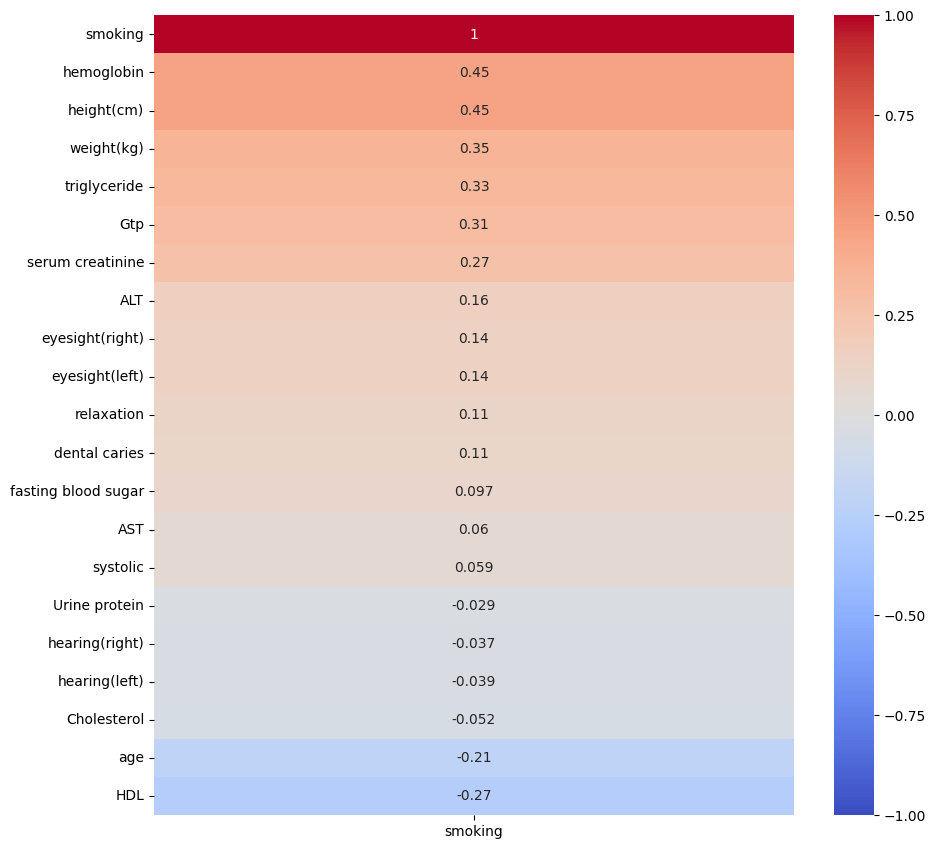

In [13]:
cols = list(db.columns)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = db.corr()[['smoking']].sort_values(by='smoking', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(db["smoking"], db["dental caries"])

chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi² = {chi2:.2f}")
print(f"p-value = {p:.4f}")


Chi² = 1810.74
p-value = 0.0000
